# Training Visualization 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from six.moves import cPickle as pickle
from scipy import ndimage

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

print('Modules loaded.')

Modules loaded.


In [2]:
def load_log(filename):
    try:
        with open(filename + '.pickle', 'rb') as f:
            log = pickle.load(f)
    except Exception as e:
        print('Unable to open %s : %s' %((filename + '.pickle'), e))
        return -1
    return log

In [3]:
log_model1 = load_log('ModelLog')
log_model2 = load_log('RefinedModelLog1')

In [4]:
def sort_with_index(array,index):
    tmp = np.ones(len(array),dtype=np.float32)
    for i in range(len(array)):
        tmp[i] = array[index[i]]
    return tmp

In [5]:
def get_step_value_pairs(log, metric):
    key_sorted = np.sort(log[metric].keys())
    key_indices = np.argsort(log[metric].keys())
    return key_sorted, sort_with_index(log[metric].values(),key_indices)

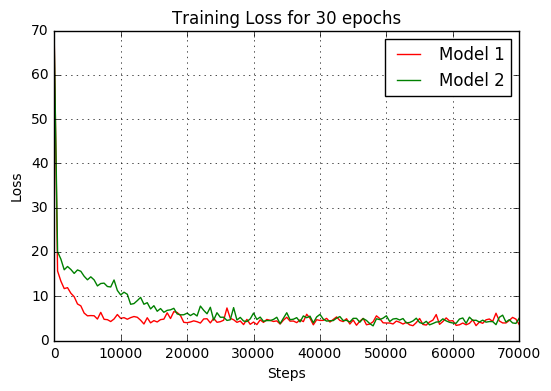

In [6]:
steps1, losses1 = get_step_value_pairs(log_model1, 'loss')
steps2, losses2 = get_step_value_pairs(log_model2, 'loss')

plt.figure()
plt.title("Training Loss for 30 epochs")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.grid()
plt.plot(steps1, losses1, '-', color="r",
             label="Model 1")
plt.plot(steps2, losses2, '-', color="g",
             label="Model 2")
plt.legend(loc="best")
plt.show()

In [7]:
def plot_train_valid_metric(keys_sorted, train_values_sorted, valid_values_sorted, title):
    plt.figure()
    plt.xlabel("Steps")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.plot(keys_sorted, train_values_sorted, '-', color="r",
                 label="Training")
    plt.plot(keys_sorted, valid_values_sorted, '-', color="g",
                 label="Validation")
    plt.legend(loc="best")    
    plt.title(title)

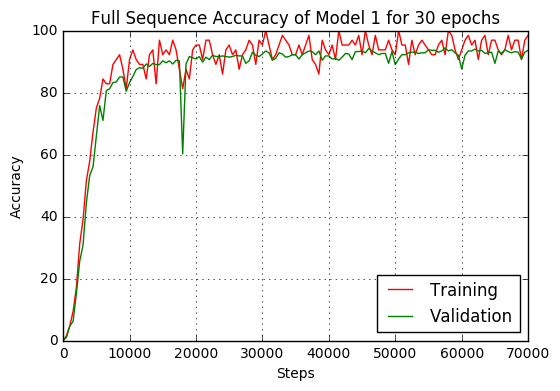

In [8]:
steps, full_acc_train_model1 = get_step_value_pairs(log_model1, 'train_acc_full')
steps, full_acc_valid_model1 = get_step_value_pairs(log_model1, 'valid_acc_full')
plot_train_valid_metric(steps, full_acc_train_model1, full_acc_valid_model1, 
                        'Full Sequence Accuracy of Model 1 for 30 epochs')

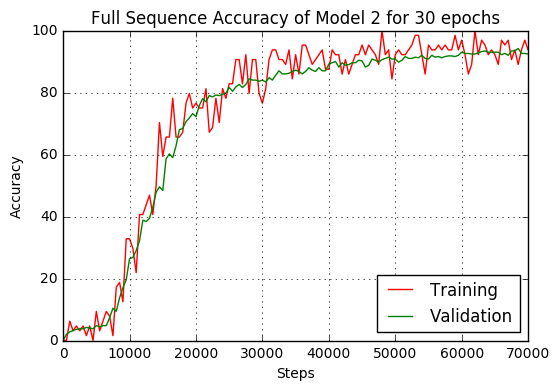

In [9]:
steps, full_acc_train_model2 = get_step_value_pairs(log_model2, 'train_acc_full')
steps, full_acc_valid_model2 = get_step_value_pairs(log_model2, 'valid_acc_full')
plot_train_valid_metric(steps, full_acc_train_model2, full_acc_valid_model2, 
                        'Full Sequence Accuracy of Model 2 for 30 epochs')

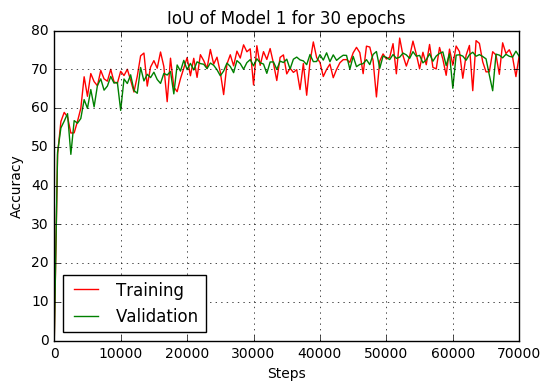

In [10]:
steps, iou_train_model1 = get_step_value_pairs(log_model1, 'train_iou')
steps, iou_valid_model1 = get_step_value_pairs(log_model1, 'valid_iou')
plot_train_valid_metric(steps, iou_train_model1, iou_valid_model1, 
                        'IoU of Model 1 for 30 epochs')

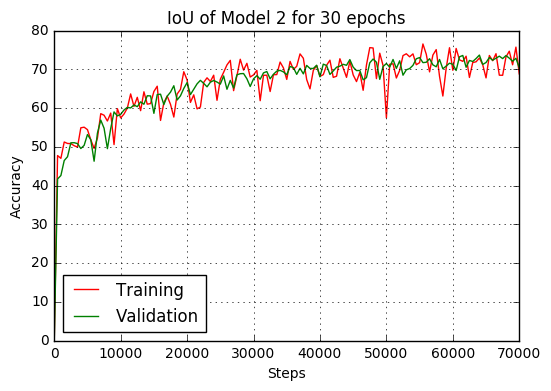

In [11]:
steps, iou_train_model2 = get_step_value_pairs(log_model2, 'train_iou')
steps, iou_valid_model2 = get_step_value_pairs(log_model2, 'valid_iou')
plot_train_valid_metric(steps, iou_train_model2, iou_valid_model2, 
                        'IoU of Model 2 for 30 epochs')